**Abisa Osei-Amankwah**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pca import PCA

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4: Eigenfaces — PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a [link](https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf) to original paper.

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a. Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

*More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/*

In [4]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b. Look at the face data

In the cell below, fill in the function to create a 6x5 subplots grid of plots (*6 rows, 5 columns*). In each plot, show one of the first 30 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):

Run the function to create the plot of the faces below.

**Note:**
- When you call `imshow`, add this optional parameter (otherwise faces will look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

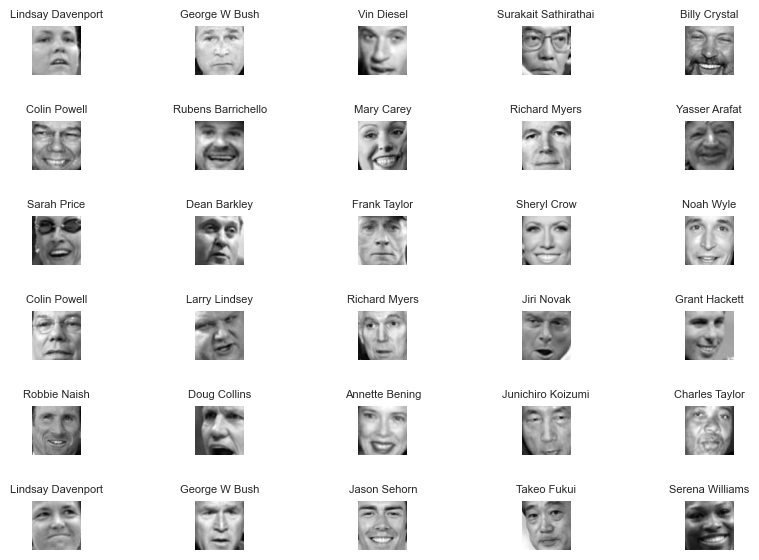

In [5]:
def face_plot(face_imgs, face_names):
    '''Creates a 6x5 grid of grayscale face images.
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    NOTE: Each grayscale image should have a title with the person's name in it.
    '''
    num_faces = len(face_names)
    
    fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(9, 6))
    
    for i in range(6):
        for j in range(5):
            idx = i * 5 + j
            if idx < num_faces:
                axes[i, j].imshow(face_imgs[idx], cmap='gray')
                axes[i, j].set_title(face_names[idx], fontsize=8)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
        
    
    plt.tight_layout()
    plt.show()
    

face_plot(face_imgs, face_names)

### 4c. Visualize the "mean face"

Take the mean face image across the dataset and show it below.

**Note:** Use the same `cmap` parameter as above and turn off x and y tick marks.

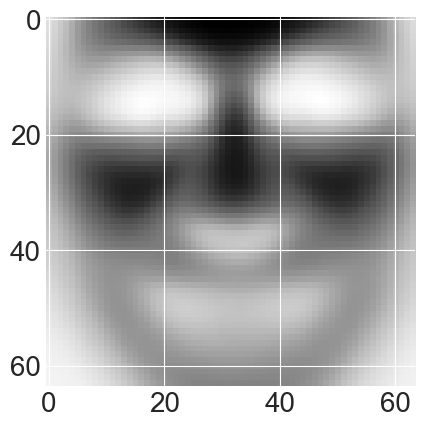

In [6]:
num_faces = len(face_imgs)
mean_face = np.sum(face_imgs, axis=0) / num_faces

plt.imshow(mean_face)


### 4d. Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


In the following cell, reshape the face data **without hardcoding** ANY of (13231, 64*64)!

In [7]:
# Your reshape code here

face_imgs_vec = face_imgs.reshape(face_imgs.shape[0], -1)

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e. Perform PCA on preprocessed face data

Create pandas DataFrame object that holds the face data then run PCA on the face dataset. The header names of consecutive integers `0, 1, ..., 4095` are fine. For the `vars` parameter in the `fit` method, pass in a Python list of ints (`0, 1, ..., 4095`).

**Notes:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [14]:
import time

df = pd.DataFrame(face_imgs_vec)

df_pca = PCA(df)

start_time = time.time()
print(start_time)

df_pca.fit(np.array(range(df.shape[1])))

end_time = time.time() - start_time
print(end_time)


1712805452.0296786
76.4595251083374


### 4f. Make face PCA elbow plot

Make an elbow plot of the PCA results. Show **only show a reasonable number of PCs** to focus on the curve before it plateaus.

In [ ]:

df_pca.elbow_plot()

### 4g. Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 97%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
3. Use `face_plot` to plot the reconstructed 1st 30 faces with each of the variance numbers above.

**There should be 4 6x5 plots below**

In [19]:
def make_imgs(X):
    X = np.reshape(X, (13231,64,64))
    return X
    

#### 50% variance face grid

In [ ]:

cum_vars = np.array(df_pca.get_cum_var())
num_pcs_to_keep = (np.argmax(cum_vars >= .50)) + 1

pca_proj = df_pca.pca_then_project_back(num_pcs_to_keep)
    
reconstructed_images = make_imgs(pca_proj)

face_plot(reconstructed_images, face_names)


#### 70% variance face grid

In [ ]:

cum_vars = np.array(df_pca.get_cum_var())
num_pcs_to_keep = (np.argmax(cum_vars >= .70)) + 1

pca_proj = df_pca.pca_then_project_back(num_pcs_to_keep)
    
reconstructed_images = make_imgs(pca_proj)

face_plot(reconstructed_images, face_names)


#### 80% variance face grid

In [ ]:

cum_vars = np.array(df_pca.get_cum_var())
num_pcs_to_keep = (np.argmax(cum_vars >= .80)) + 1

pca_proj = df_pca.pca_then_project_back(num_pcs_to_keep)
    
reconstructed_images = make_imgs(pca_proj)

face_plot(reconstructed_images, face_names)


#### 97% variance face grid

In [ ]:

cum_vars = np.array(df_pca.get_cum_var())
num_pcs_to_keep = (np.argmax(cum_vars >= .97)) + 1

pca_proj = df_pca.pca_then_project_back(num_pcs_to_keep)
    
reconstructed_images = make_imgs(pca_proj)

face_plot(reconstructed_images, face_names)


### 4h. Questions

**Question 12:** Pick one of the celebrity faces to focus on. Describe what specifically happens in the same celebrity face over the course of the 4 plots.

**Question 13:** Let's assume that the PCA eigenvectors are fixed/fit using the dataset above and we do not change them. Say we are interested in reconstructing of others in the general population (i.e. PCA transforming images of novel people). In a paragraph, describe how well you would expect this to work, noting any concerns you might have. **Reminder: I am expecting 100% original answers to questions that you write 100% yourself. Suspected use of generative AI to write or edit will result in 0 points.** I am grading your ideas, not your style/prose/grammar.



**Answer 12:** When looking at the Sheryl Crow across the four plots, we can see that as the variance increases the facial featres bedome more and more distinct on the graph. 

**Answer 13:**



## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not an AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

***Extension #1: Image Compression***

I decided to do PCA on a different part of the given dataset to see if the quality of the image compression would be consistent and to calculate the error (mse). To do this, I did something similar to what we did in the project with just some adjustments along with the addition of the mse calculation equation. 


Hypothesis #1: If we run PCA on a new part of the dataset, we will find that the results are consistent
Answer: True, the results looked pretty consistent from the original run through with the first portion of the data in the set. I think this does show a bit that this would be consistent for the whole dataset, but I do think we would need to run more data and see to get a more general idea

Hypothesis #2: If we calculate the error when the cum. variance is 50%(1096.8205512131626) and 97%(51.074826312689275), the former will be greater than the latter.
Answer: True, the mse for 50% ended up being significantly higher than the mse for the latter which indicates that the error does decreases as cum variance increases. However, from these results, I don't think the error would be zero if cum var was 100%.

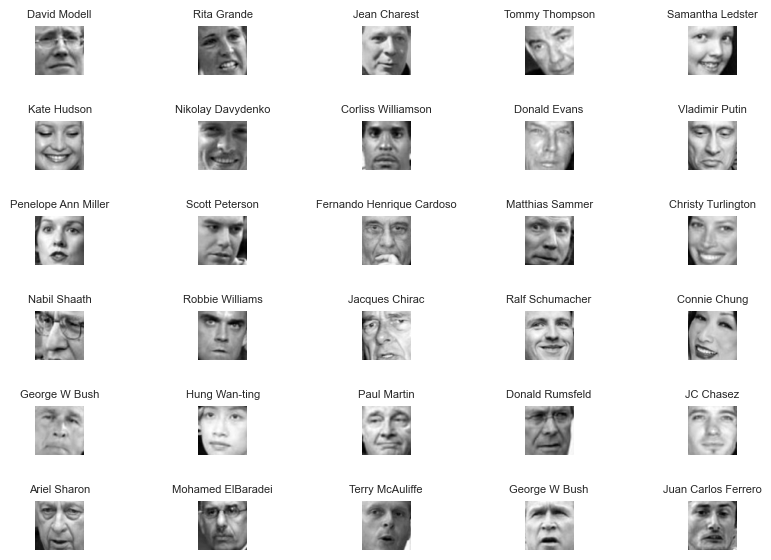

In [23]:
def face_plot_two(face_imgs, face_names):
    num_faces = len(face_names)
    
    fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(9, 6))
    
    for i in range(6):
        for j in range(5):
            idx = i * 6 + j +63
            if idx < num_faces:
                axes[i, j].imshow(face_imgs[idx], cmap='gray')
                axes[i, j].set_title(face_names[idx], fontsize=8)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
        
    
    plt.tight_layout()
    plt.show()
    

face_plot_two(face_imgs, face_names)

In [ ]:
num_faces = len(face_imgs)
mean_face = np.sum(face_imgs, axis=0) / num_faces

plt.imshow(mean_face)

In [ ]:
face_imgs_vec = face_imgs.reshape(face_imgs.shape[0], -1)

In [16]:
df = pd.DataFrame(face_imgs_vec)

df_pca = PCA(df)

df_pca.fit(np.array(range(df.shape[1])))

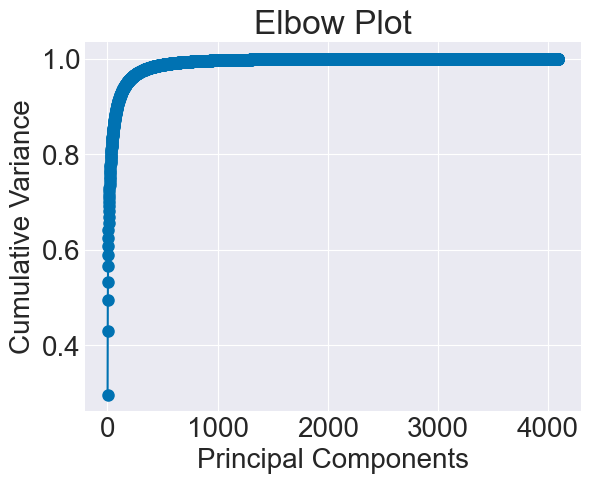

In [17]:
df_pca.elbow_plot()

1096.8205512131626


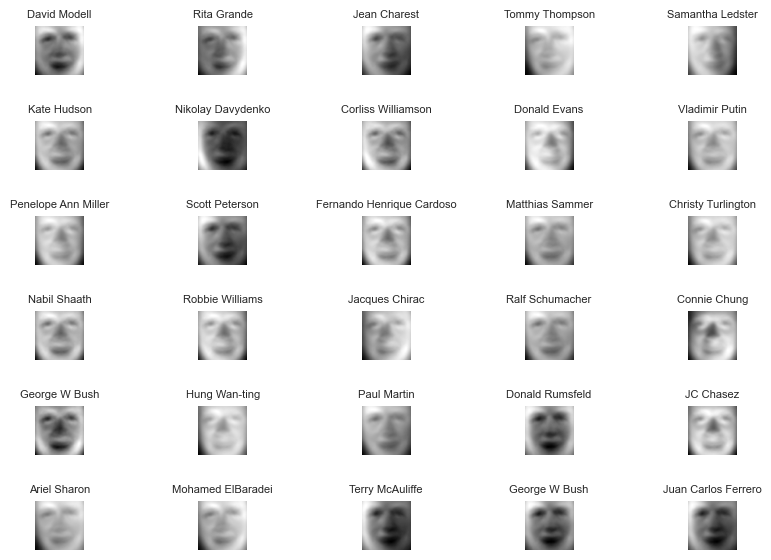

In [30]:
cum_vars = np.array(df_pca.get_cum_var())
num_pcs_to_keep = (np.argmax(cum_vars >= .50)) + 1

pca_proj = df_pca.pca_then_project_back(num_pcs_to_keep)
    
reconstructed_images = make_imgs(pca_proj)

#error 
mse = np.mean((face_imgs - reconstructed_images) ** 2)
print(mse)

face_plot_two(reconstructed_images, face_names)

51.074826312689275


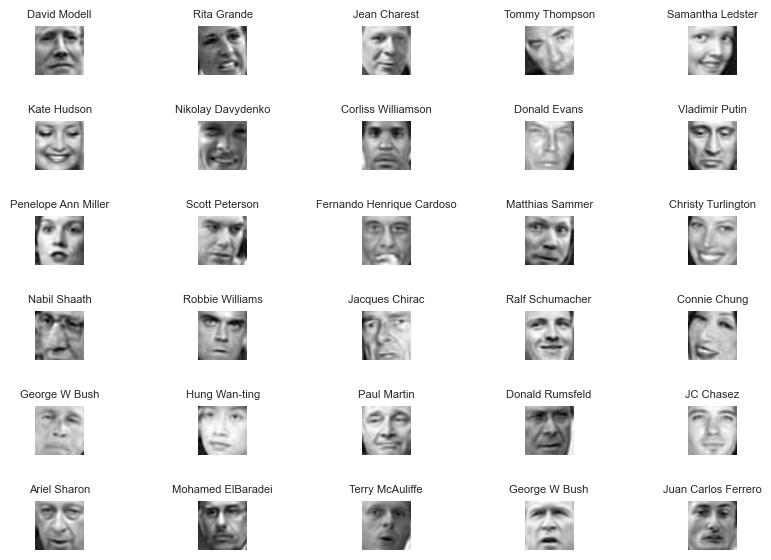

In [28]:
cum_vars = np.array(df_pca.get_cum_var())
num_pcs_to_keep = (np.argmax(cum_vars >= .97)) + 1

pca_proj = df_pca.pca_then_project_back(num_pcs_to_keep)
    
reconstructed_images = make_imgs(pca_proj)
#error
mse = np.mean((face_imgs - reconstructed_images) ** 2)
print(mse)

face_plot_two(reconstructed_images, face_names)

***Extension #2: In-Class Documentary Extension*** The documentary mainly discussed how data models can demonstrate racial bias, which was connected to how it was a catalyst of the history of the internet which within itself was biased/skewed being predominately white males. More specifically, the documentary spoke about the importance of algorithmic transparency and accountability. The documentary highlights instances where algorithmic decision-making systems have led to discriminatory outcomes. This then leads to racial profiling in predictive policing or biased hiring practices in job recruitment platforms. To fix or aid this, the documentary points out the impact of the lack of diversity and representation in the tech industry, specifically among those who design and develop algorithms. It emphasizes the importance of diversity in the tech workforce to mitigate bias and promote inclusivity in algorithmic decision-making processes. Overall, the documentary provided a method of exploration of the ethical and social implications of AI and algorithms that have and will continue to be fought over especially as AI and algorithm use grows. 

